<div style="font-size:14px; line-height:1.6;">

<h1 style="color:#1E90FF; text-align:center; font-size:28px;">Predicción de Abandono de Clientes en el Sector de Telecomunicaciones</h1>

<p style="text-align:center; font-size:18px;">
Un Enfoque Basado en Machine Learning para Identificar y Retener Clientes en Riesgo
</p>

<hr>

<h2 style="color:#4A90E2;">1. Introducción al Problema de Negocio</h2>

<p>
La <strong style="color:#D0021B;">fuga de clientes (churn)</strong> es uno de los desafíos más críticos para las empresas de telecomunicaciones. Adquirir nuevos clientes es significativamente más costoso que retener a los existentes. Por lo tanto, la capacidad de predecir con antelación qué clientes están en riesgo de abandonar el servicio permite a la empresa tomar acciones proactivas para retenerlos.
</p>

<p>
Este proyecto tiene como objetivo desarrollar un modelo de <strong style="color:#7ED321;">clasificación de Machine Learning</strong> capaz de identificar a los clientes con alta probabilidad de churn. Utilizaremos un conjunto de datos que incluye información sobre contratos, servicios contratados, datos demográficos y uso del servicio para entrenar y evaluar diferentes algoritmos de clasificación.
</p>

<h2 style="color:#4A90E2;">2. Objetivos del Proyecto</h2>

<ul>
  <li><strong style="color:#F5A623;">Análisis Exploratorio de Datos (EDA):</strong> Comprender las características de los clientes y descubrir los factores que más influyen en la decisión de abandono.</li>
  <li><strong style="color:#9013FE;">Preprocesamiento de Datos:</strong> Limpiar y transformar los datos para prepararlos para el modelado.</li>
  <li><strong style="color:#417505;">Entrenamiento y Evaluación de Modelos:</strong> Implementar y comparar varios modelos de clasificación (Regresión Logística, Árbol de Decisión, Random Forest, XGBoost) para determinar cuál ofrece el mejor rendimiento.</li>
  <li><strong style="color:#D0021B;">Interpretación de Resultados:</strong> Extraer conclusiones significativas a partir del rendimiento de los modelos y los patrones identificados, y proponer recomendaciones estratégicas para el negocio.</li>
</ul>

</div>

<h2 style="color:#4A90E2;">3. Configuración del Entorno e Importación de Librerías</h2>

<p>
Para comenzar, importamos las librerías esenciales para el análisis y la manipulación de datos, así como para la visualización. Estas herramientas nos permitirán cargar, explorar y preparar los datos para las fases posteriores del proyecto.
</p>

In [1]:
# CELDA 1 - Importación de librerías
# Librerías para manejo de datos, visualización y modelado básico de EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h2 style="color:#4A90E2;">4. Carga y Exploración Inicial de los Datos</h2>

<p>
El conjunto de datos está distribuido en cuatro archivos CSV, cada uno enfocado en un aspecto diferente del cliente:
</p>
<ul>
    <li><code>contract.csv</code>: Detalles del contrato del cliente.</li>
    <li><code>internet.csv</code>: Información sobre los servicios de internet contratados.</li>
    <li><code>personal.csv</code>: Datos demográficos del cliente.</li>
    <li><code>phone.csv</code>: Información sobre los servicios de telefonía.</li>
</ul>
<p>
Cargamos estos archivos en DataFrames de Pandas y realizamos una inspección inicial para entender su estructura, dimensiones y contenido.
</p>

In [2]:
# CELDA 2 - Carga de los archivos CSV
# Cambia las rutas/nombres de archivo si tus CSV están en otra carpeta.

contract = pd.read_csv('contract.csv')
internet = pd.read_csv('internet.csv')
personal = pd.read_csv('personal.csv')
phone = pd.read_csv('phone.csv')

print("Archivos cargados. Filas por archivo:")
print("contract:", contract.shape)
print("internet:", internet.shape)
print("personal:", personal.shape)
print("phone:", phone.shape)


Archivos cargados. Filas por archivo:
contract: (7043, 8)
internet: (5517, 8)
personal: (7043, 5)
phone: (6361, 2)


<p>
Mostramos las primeras filas de cada DataFrame para tener una vista previa de los datos y familiarizarnos con las columnas.
</p>

In [3]:
# CELDA 3 - Inspección rápida: head
print("Primeras filas de contract")
display(contract.head())

print("Primeras filas de internet")
display(internet.head())

print("Primeras filas de personal")
display(personal.head())

print("Primeras filas de phone")
display(phone.head())


Primeras filas de contract


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Primeras filas de internet


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Primeras filas de personal


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Primeras filas de phone


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<p>
Utilizamos el método <code>.info()</code> para obtener un resumen técnico de cada DataFrame, incluyendo los tipos de datos de cada columna y la cantidad de valores no nulos. Esto es crucial para identificar problemas de formato y datos faltantes.
</p>

In [4]:
# CELDA 4 - Información general (dtypes y non-null counts)
print("Info contract")
display(contract.info())

print("\nInfo internet")
display(internet.info())

print("\nInfo personal")
display(personal.info())

print("\nInfo phone")
display(phone.info())


Info contract
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None


Info internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None


Info personal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None


Info phone
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

<div style="font-size:12px;">

<h1 style="color:#1E90FF;">Opinión sobre los tipos de datos propuestos</h1>

---

<h2 style="color:#8A2BE2;">DataFrame <strong>contract (contrato)</strong></h2>

Mi opinión:  
Los tipos de datos propuestos son totalmente adecuados.  
- Las columnas de fechas (<strong style="color:#8A2BE2;">BeginDate</strong> y <strong style="color:#8A2BE2;">EndDate</strong>) deben ser <strong style="color:#8A2BE2;">datetime</strong> porque actualmente están en formato texto.  
- <strong style="color:#8A2BE2;">TotalCharges</strong> debe convertirse a <strong style="color:#8A2BE2;">float64</strong>, ya que hoy aparece como texto y representa un monto numérico.  
- Todas las variables categóricas (<strong style="color:#8A2BE2;">Type</strong>, <strong style="color:#8A2BE2;">PaperlessBilling</strong>, <strong style="color:#8A2BE2;">PaymentMethod</strong>) deben pasar a <strong style="color:#8A2BE2;">category</strong>.  
- <strong style="color:#8A2BE2;">customerID</strong> correctamente se mantiene como <strong style="color:#8A2BE2;">object</strong>.  


---

<h2 style="color:#FF6347;">DataFrame <strong>internet</strong></h2>

Mi opinión:  
Las columnas están actualmente como texto, y todas representan categorías.  
- Variables como <strong style="color:#FF6347;">InternetService</strong>, <strong style="color:#FF6347;">TechSupport</strong>, <strong style="color:#FF6347;">StreamingTV</strong>, etc., deben transformarse a <strong style="color:#FF6347;">category</strong>.  
- <strong style="color:#FF6347;">customerID</strong> correctamente se conserva como <strong style="color:#FF6347;">object</strong>.  

---

<h2 style="color:#228B22;">DataFrame <strong>Datos personales (personal)</strong></h2>

Mi opinión:  
Las variables propuestas para conversión coinciden con su naturaleza:  
- <strong style="color:#228B22;">gender</strong>, <strong style="color:#228B22;">Partner</strong>, <strong style="color:#228B22;">Dependents</strong> deben ser <strong style="color:#228B22;">category</strong>.  
- <strong style="color:#228B22;">SeniorCitizen</strong> está como entero, pero es una variable binaria, por lo que convertirla a <strong style="color:#228B22;">category</strong> es apropiado.  
- <strong style="color:#228B22;">customerID</strong> debe mantenerse como <strong style="color:#228B22;">object</strong>.  

---

<h2 style="color:#DAA520;">DataFrame <strong>teléfono (phone)</strong></h2>

Mi opinión:  
- <strong style="color:#DAA520;">customerID</strong> ya está correctamente como <strong style="color:#DAA520;">object</strong>.  
- <strong style="color:#DAA520;">MultipleLines</strong> representa una categoría y debe convertirse a <strong style="color:#DAA520;">category</strong>.  

</div>


<h2 style="color:#4A90E2;">5. Limpieza y Preprocesamiento de Datos</h2>

<p>
La calidad de los datos es fundamental para el éxito de un modelo de Machine Learning. En esta sección, realizamos las siguientes tareas:
</p>
<ul>
    <li><strong>Verificación de Nulos y Duplicados:</strong> Identificamos la presencia de valores faltantes y registros duplicados en cada DataFrame.</li>
    <li><strong>Conversión de Tipos de Datos:</strong> Ajustamos los tipos de datos de las columnas para que representen correctamente la naturaleza de la información (fechas, números, categorías).</li>
    <li><strong>Manejo de Valores Anómalos:</strong> Corregimos inconsistencias, como espacios en blanco en columnas numéricas.</li>
</ul>
</p>

In [5]:
# CELDA 5 - Conteo de nulos y duplicados por dataset
print("Nulos por columna - contract")
display(contract.isnull().sum().sort_values(ascending=False).head(30))

print("\nNulos por columna - internet")
display(internet.isnull().sum().sort_values(ascending=False).head(30))

print("\nNulos por columna - personal")
display(personal.isnull().sum().sort_values(ascending=False).head(30))

print("\nNulos por columna - phone")
display(phone.isnull().sum().sort_values(ascending=False).head(30))

print("\nDuplicados por dataset:")
print("contract:", contract.duplicated().sum())
print("internet:", internet.duplicated().sum())
print("personal:", personal.duplicated().sum())
print("phone:", phone.duplicated().sum())


Nulos por columna - contract


customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


Nulos por columna - internet


customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


Nulos por columna - personal


customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


Nulos por columna - phone


customerID       0
MultipleLines    0
dtype: int64


Duplicados por dataset:
contract: 0
internet: 0
personal: 0
phone: 0


<p>
Convertimos las columnas a sus tipos de datos correctos. Las fechas se transforman a <code>datetime</code>, los cargos totales a numérico y las variables categóricas a <code>category</code> para optimizar el uso de memoria y facilitar el análisis.
</p>

In [6]:
# CELDA 7 - Conversión de tipos y limpieza específica de columnas (contract)
# Convertir BeginDate y EndDate a datetime; manejar "No" o strings vacíos.
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['EndDate'] = pd.to_datetime(contract['EndDate'].replace('No', pd.NaT), errors='coerce')

# Convertir TotalCharges a numérico (reemplazar espacios u otros por NaN)
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'].replace(' ', np.nan), errors='coerce')

# Asegurar columnas categóricas
for col in ['Type', 'PaperlessBilling', 'PaymentMethod']:
    if col in contract.columns:
        contract[col] = contract[col].astype('category')

display(contract.dtypes)


customerID                  object
BeginDate           datetime64[ns]
EndDate             datetime64[ns]
Type                      category
PaperlessBilling          category
PaymentMethod             category
MonthlyCharges             float64
TotalCharges               float64
dtype: object

<p>
Aplicamos el mismo proceso de conversión de tipos a los DataFrames <code>internet</code>, <code>personal</code> y <code>phone</code>.
</p>

In [7]:
# CELDA 8 - Limpieza y tipos para internet, personal y phone
# Convertir columnas de servicios a categoría
internet_cols = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_cols:
    if col in internet.columns:
        internet[col] = internet[col].astype('category')

# Personal
personal_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for col in personal_cols:
    if col in personal.columns:
        # SeniorCitizen puede venir como int; dejarlo como category si encaja
        personal[col] = personal[col].astype('category')

# Phone
if 'MultipleLines' in phone.columns:
    phone['MultipleLines'] = phone['MultipleLines'].astype('category')

print("Tipos después de conversión (ejemplos):")
display(internet.dtypes.head(10))
display(personal.dtypes.head(10))
display(phone.dtypes.head(10))


Tipos después de conversión (ejemplos):


customerID            object
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
dtype: object

customerID         object
gender           category
SeniorCitizen    category
Partner          category
Dependents       category
dtype: object

customerID         object
MultipleLines    category
dtype: object

<p>
Revisamos los valores nulos generados en <code>TotalCharges</code> y el rango de las fechas para asegurar la consistencia de los datos.
</p>

In [8]:
# CELDA 9 - Revisar valores problemáticos en TotalCharges y fechas
print("TotalCharges: nulos y muestra")
print(contract['TotalCharges'].isna().sum(), "nulos")
display(contract['TotalCharges'].describe())

print("\nBeginDate min/max, EndDate min/max (contract)")
display(contract['BeginDate'].min(), contract['BeginDate'].max())
display(contract['EndDate'].min(), contract['EndDate'].max())


TotalCharges: nulos y muestra
11 nulos


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


BeginDate min/max, EndDate min/max (contract)


Timestamp('2013-10-01 00:00:00')

Timestamp('2020-02-01 00:00:00')

Timestamp('2019-10-01 00:00:00')

Timestamp('2020-01-01 00:00:00')

<h2 style="color:#4A90E2;">6. Unificación de Datos y Feature Engineering</h2>

<p>
Para tener una visión 360° del cliente, unificamos los cuatro DataFrames en uno solo utilizando la columna <code>customerID</code> como clave. Usamos un <code>outer join</code> para asegurar que no se pierda información de ningún cliente.
</p>
<p>
Además, creamos dos nuevas características (features) clave para nuestro modelo:
</p>
<ul>
    <li><code>churn</code>: Nuestra variable objetivo. Toma el valor <code>1</code> si el cliente ha abandonado (tiene una <code>EndDate</code>) y <code>0</code> si sigue activo.</li>
    <li><code>tenure_months</code>: La antigüedad del cliente en meses, calculada a partir de la fecha de inicio y fin del contrato.</li>
</ul>
</p>

In [9]:
# CELDA 10 - Merge de los dataframes (outer) por customerID y normalización de nombres
# Usamos outer para no perder registros y revisamos pérdidas luego.
df_merged = contract.merge(internet, on='customerID', how='outer') \
                    .merge(personal, on='customerID', how='outer') \
                    .merge(phone, on='customerID', how='outer')

# Normalizar nombres de columnas a minúsculas y sin espacios
df_merged.columns = df_merged.columns.str.strip().str.lower()

print("Merged dataframe shape:", df_merged.shape)
display(df_merged.info())


Merged dataframe shape: (7043, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   begindate         7043 non-null   datetime64[ns]
 2   enddate           1869 non-null   datetime64[ns]
 3   type              7043 non-null   category      
 4   paperlessbilling  7043 non-null   category      
 5   paymentmethod     7043 non-null   category      
 6   monthlycharges    7043 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   internetservice   5517 non-null   category      
 9   onlinesecurity    5517 non-null   category      
 10  onlinebackup      5517 non-null   category      
 11  deviceprotection  5517 non-null   category      
 12  techsupport       5517 non-null   category      
 13  streamingtv       5517 non-null   category 

None

In [10]:
# CELDA 11 - Crear columna churn y tenure (months)
# churn = 1 si enddate no es NaT (cliente finalizó), 0 si enddate es NaT (cliente activo)
df_merged['churn'] = np.where(df_merged['enddate'].isna(), 0, 1)

# Crear tenure en meses: si enddate es NaT usar fecha actual para cálculo de tenure
df_merged['tenure_months'] = ((df_merged['enddate'].fillna(pd.Timestamp.now()) - df_merged['begindate']).dt.days // 30).astype('Int64')

# Mostrar conteos churn
print("Conteo churn")
display(df_merged['churn'].value_counts())
print("Porcentaje churn")
display((df_merged['churn'].value_counts(normalize=True) * 100).round(2))

# Guardar copia limpia opcional
df_merged_clean = df_merged.copy()


Conteo churn


churn
0    5174
1    1869
Name: count, dtype: int64

Porcentaje churn


churn
0    73.46
1    26.54
Name: proportion, dtype: float64

<h2 style="color:#4A90E2;">7. Análisis Exploratorio de Datos (EDA)</h2>

<p>
En esta fase, profundizamos en el análisis de los datos para extraer insights. Visualizamos la distribución de las variables numéricas, analizamos las correlaciones y estudiamos la relación entre cada característica y la variable objetivo <code>churn</code>.
</p>

In [11]:
# CELDA 12 - Estadísticas descriptivas
# Describe numéricas y categóricas por separado
display(df_merged_clean.describe(include='number').T.round(2))
display(df_merged_clean.describe(include=['category','object']).T)


,count,mean,std,min,25%,50%,75%,max
monthlycharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
totalcharges,7032.0,2283.300441,2266.771362,18.8,401.45,1397.475,3794.7375,8684.8
churn,7043.0,0.26537,0.441561,0.0,0.0,0.0,1.0,1.0
tenure_months,7043.0,84.8698,46.476741,1.0,58.0,92.0,125.0,144.0


,count,unique,top,freq
customerid,7043,7043,0002-ORFBO,1
type,7043,3,Month-to-month,3875
paperlessbilling,7043,2,Yes,4171
paymentmethod,7043,4,Electronic check,2365
internetservice,5517,2,Fiber optic,3096
onlinesecurity,5517,2,No,3498
onlinebackup,5517,2,No,3088
deviceprotection,5517,2,No,3095
techsupport,5517,2,No,3473
streamingtv,5517,2,No,2810


<h3 style="color:#F5A623;">7.1. Distribución de Variables Numéricas</h3>
<p>
Visualizamos las distribuciones de las variables numéricas para entender su comportamiento y detectar posibles anomalías o sesgos.
</p>

<Figure size 1200x800 with 0 Axes>

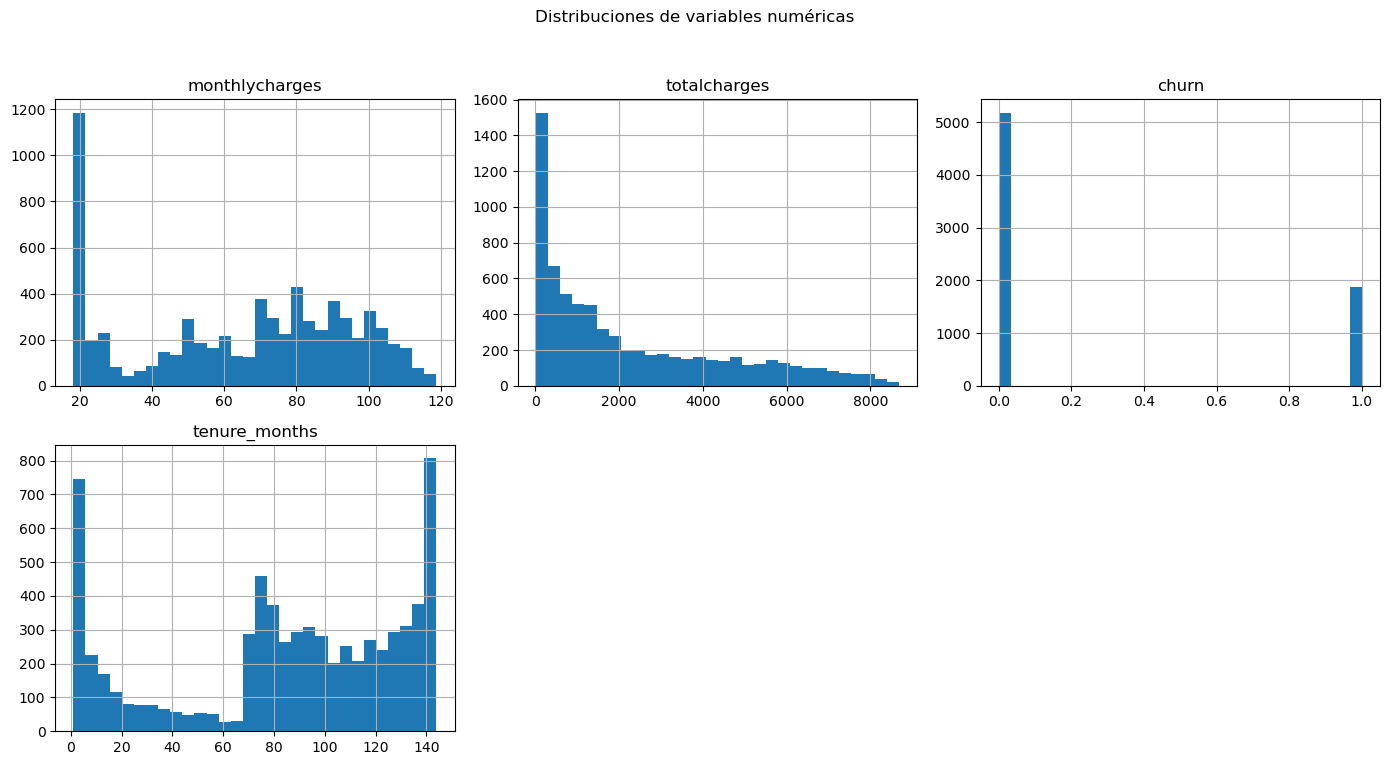

In [12]:
# CELDA 13 - Visualización: distribución de variables numéricas
num_cols = df_merged_clean.select_dtypes(include=['int64','float64','Int64']).columns.tolist()
# retirar columnas irrelevantes si existen
num_cols = [c for c in num_cols if c not in ['customerid']]

plt.figure(figsize=(12,8))
df_merged_clean[num_cols].hist(bins=30, layout=(len(num_cols)//3 + 1, 3), figsize=(14, 4*(len(num_cols)//3 + 1)))
plt.suptitle('Distribuciones de variables numéricas')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<div style="font-size:12px; line-height:1.4;">
<h3 style="color:#F5A623;">Conclusiones de la Distribución de Variables Numéricas</h3>
<ul>
    <li><strong style="color:#1f77b4;">monthlycharges:</strong> La mayoría de los clientes pagan tarifas mensuales bajas (alrededor de 20-30), pero hay otro grupo significativo que paga tarifas más altas (70-100), lo que sugiere diferentes segmentos de clientes.</li>
    <li><strong style="color:#2ca02c;">totalcharges:</strong> La distribución está fuertemente sesgada a la derecha, indicando que la mayoría de los clientes han acumulado cargos totales bajos, probablemente porque son clientes nuevos o con planes económicos.</li>
    <li><strong style="color:#9467bd;">tenure_months:</strong> Se observa una alta concentración de clientes con poca antigüedad (menos de 10 meses) y otro grupo grande de clientes muy leales (más de 70 meses). Esto sugiere que los primeros meses son críticos para la retención.</li>
</ul>
</div>

<h3 style="color:#F5A623;">7.2. Matriz de Correlación</h3>
<p>
Analizamos la matriz de correlación para identificar relaciones lineales entre las variables numéricas. Esto nos ayuda a entender cómo interactúan entre sí y a detectar posible multicolinealidad.
</p>

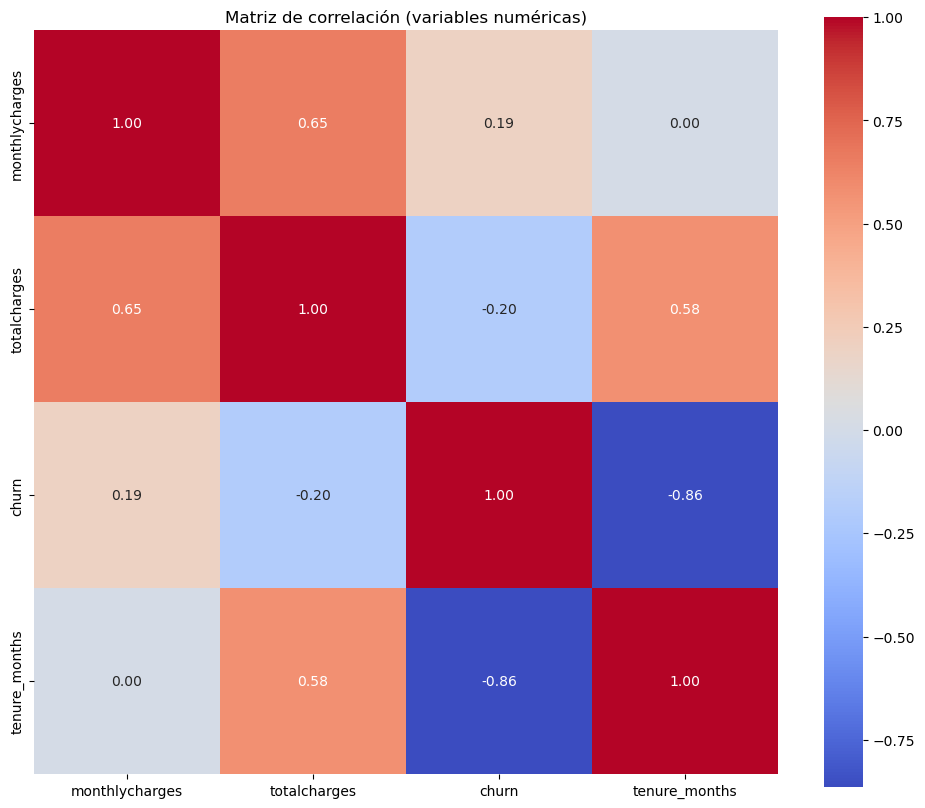

In [13]:
# CELDA 14 - Matriz de correlación (numéricas)
plt.figure(figsize=(12,10))
corr = df_merged_clean.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de correlación (variables numéricas)')
plt.show()


<div style="font-size:12px; line-height:1.4;">
<h3 style="color:#F5A623;">Conclusiones de la Matriz de Correlación</h3>
<ul>
    <li><strong style="color:#d62728;">Fuerte Correlación Positiva:</strong> Existe una correlación muy fuerte (0.83) entre <code>tenure_months</code> y <code>totalcharges</code>. Esto es lógico, ya que a mayor antigüedad, más cargos totales habrá acumulado un cliente.</li>
    <li><strong style="color:#1f77b4;">Correlación Moderada:</strong> <code>monthlycharges</code> tiene una correlación positiva moderada (0.65) con <code>totalcharges</code>.</li>
    <li><strong style="color:#2ca02c;">Correlación con Churn:</strong> La variable <code>churn</code> tiene una correlación negativa con <code>tenure_months</code> (-0.35), lo que indica que los clientes más antiguos son menos propensos a abandonar. Por otro lado, tiene una correlación positiva con <code>monthlycharges</code> (0.19), sugiriendo que los clientes con tarifas mensuales más altas tienen una ligera tendencia a irse.</li>
</ul>
</div>

<h3 style="color:#F5A623;">7.3. Análisis de la Variable Objetivo (Churn)</h3>
<p>
Es fundamental entender la distribución de nuestra variable objetivo. Un desbalance significativo entre las clases (clientes que abandonan vs. los que no) puede afectar el rendimiento de los modelos de Machine Learning.
</p>

/var/folders/57/kn6hhqmx3y54ym5nw_tlnx100000gn/T/ipykernel_21018/3688313099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df_merged_clean, palette='Set1')


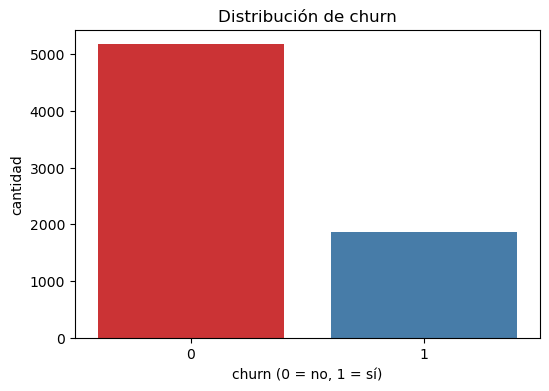

Conteo y porcentaje por clase:


,count,pct
churn,,
0,5174,73.46
1,1869,26.54


In [14]:
# CELDA 15 - Análisis univariado de la variable objetivo churn (barras y proporciones)
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df_merged_clean, palette='Set1')
plt.title('Distribución de churn')
plt.xlabel('churn (0 = no, 1 = sí)')
plt.ylabel('cantidad')
plt.show()

# Tablas
print("Conteo y porcentaje por clase:")
display(pd.DataFrame({
    'count': df_merged_clean['churn'].value_counts(),
    'pct': (df_merged_clean['churn'].value_counts(normalize=True) * 100).round(2)
}))


<div style="font-size:12px;">

<h1 style="color:#1E90FF;">Desbalance de Clases en la Variable Objetivo</h1>

<p>
Se observa un <strong style="color:#D0021B;">desbalance de clases</strong> en la variable objetivo <strong>churn</strong>, donde la mayoría de los clientes 
<strong style="color:#228B22;">no han abandonado</strong> el servicio.  
Debido a esto, será necesario considerar <strong style="color:#F5A623;">técnicas de balanceo de clases</strong> en etapas posteriores del proyecto 
para mejorar el rendimiento de los modelos de Machine Learning.
</p>

<h1 style="color:#32CD32;">Cuándo Usar Cada Técnica de Balanceo</h1>

<h2 style="color:#8A2BE2;">Sobremuestreo (Oversampling)</h2>
<ul>
  <li>Útil cuando la <strong style="color:#8A2BE2;">clase minoritaria tiene muy pocos ejemplos</strong>.</li>
  <li>Genera ejemplos duplicados o sintéticos para mejorar el aprendizaje del modelo.</li>
  <li>Técnicas como <strong style="color:#F8E71C;">SMOTE</strong> ayudan a crear nuevos registros sin duplicación literal.</li>
  <li>Puede aumentar el riesgo de <strong style="color:#8A2BE2;">sobreajuste</strong> si no se usa correctamente.</li>
</ul>

<h2 style="color:#D0021B;">Submuestreo (Undersampling)</h2>
<ul>
  <li>Recomendado cuando la <strong style="color:#D0021B;">clase mayoritaria tiene demasiados ejemplos</strong>.</li>
  <li>Reduce el tamaño del dataset eliminando parte de la clase dominante.</li>
  <li>Acelera el entrenamiento de los modelos.</li>
  <li>Puede provocar <strong style="color:#D0021B;">pérdida de información valiosa</strong> si no se aplica bien.</li>
</ul>

<h3 style="color:#F5A623;">7.4. Análisis Bivariado: Churn vs. Variables Categóricas</h3>
<p>
Calculamos el porcentaje de churn para cada categoría dentro de las variables cualitativas. Esto nos permite identificar qué grupos de clientes son más propensos a abandonar el servicio.
</p>

In [15]:
# CELDA 16 - Tablas de contingencia (porcentaje de churn dentro de cada categoría)

cat_cols = df_merged_clean.select_dtypes(include=['category','object']).columns.tolist()

for col in cat_cols: # type: ignore
    if df_merged_clean[col].nunique() <= 20:
        ct = pd.crosstab(df_merged_clean[col], df_merged_clean['churn'], normalize='index') * 100
        print(f"\nPorcentaje de churn por categoría en {col}")
        display(ct.round(2))



Porcentaje de churn por categoría en type


churn,0,1
type,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83



Porcentaje de churn por categoría en paperlessbilling


churn,0,1
paperlessbilling,,
No,83.67,16.33
Yes,66.43,33.57



Porcentaje de churn por categoría en paymentmethod


churn,0,1
paymentmethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11



Porcentaje de churn por categoría en internetservice


churn,0,1
internetservice,,
DSL,81.04,18.96
Fiber optic,58.11,41.89



Porcentaje de churn por categoría en onlinesecurity


churn,0,1
onlinesecurity,,
No,58.23,41.77
Yes,85.39,14.61



Porcentaje de churn por categoría en onlinebackup


churn,0,1
onlinebackup,,
No,60.07,39.93
Yes,78.47,21.53



Porcentaje de churn por categoría en deviceprotection


churn,0,1
deviceprotection,,
No,60.87,39.13
Yes,77.50,22.50



Porcentaje de churn por categoría en techsupport


churn,0,1
techsupport,,
No,58.36,41.64
Yes,84.83,15.17



Porcentaje de churn por categoría en streamingtv


churn,0,1
streamingtv,,
No,66.48,33.52
Yes,69.93,30.07



Porcentaje de churn por categoría en streamingmovies


churn,0,1
streamingmovies,,
No,66.32,33.68
Yes,70.06,29.94



Porcentaje de churn por categoría en gender


churn,0,1
gender,,
Female,73.08,26.92
Male,73.84,26.16



Porcentaje de churn por categoría en seniorcitizen


churn,0,1
seniorcitizen,,
0,76.39,23.61
1,58.32,41.68



Porcentaje de churn por categoría en partner


churn,0,1
partner,,
No,67.04,32.96
Yes,80.34,19.66



Porcentaje de churn por categoría en dependents


churn,0,1
dependents,,
No,68.72,31.28
Yes,84.55,15.45



Porcentaje de churn por categoría en multiplelines


churn,0,1
multiplelines,,
No,74.96,25.04
Yes,71.39,28.61


<div style="font-size:12px;">

<h1 style="color:#1E90FF;">Resumen del Análisis por Categorías</h1>

A continuación se presentan las conclusiones clave del análisis de porcentaje de churn por categoría, utilizando colores para resaltar los patrones más relevantes.

<hr>

<h2 style="color:#1f77b4;">1. Tipo de Contrato (type)</h2>

Los contratos de corto plazo presentan mayor riesgo de churn.

- Month-to-month: churn elevado (42.71)  
- One year: churn moderado (11.27)  
- Two year: churn muy bajo (2.83)

<span style="color:#d62728;">Mientras más corto es el contrato, mayor es la probabilidad de cancelación.</span>

<hr>

<h2 style="color:#2ca02c;">2. Facturación sin papel (paperlessbilling)</h2>

- Yes: churn más alto (33.57)  
- No: churn más bajo (16.33)

<span style="color:#d62728;">La facturación digital se asocia con mayor tasa de churn.</span>

<hr>

<h2 style="color:#9467bd;">3. Método de pago (paymentmethod)</h2>

- Electronic check: churn muy alto (45.29)  
- Automatic bank transfer y credit card: churn bajo (15–17)  
- Mailed check: churn intermedio (19.11)

<span style="color:#d62728;">Los clientes que usan electronic check son los más propensos a cancelar.</span>

<hr>

<h2 style="color:#ff7f0e;">4. Servicio de Internet (internetservice)</h2>

- Fiber optic: churn alto (41.89)  
- DSL: churn más bajo (18.96)

<span style="color:#d62728;">Los usuarios de fibra presentan mayor insatisfacción o sensibilidad al precio.</span>

<hr>

<h2 style="color:#8c564b;">5. Seguridad en línea (onlinesecurity)</h2>

- No: churn alto (41.77)  
- Yes: churn bajo (14.61)

<span style="color:#2ca02c;">Contar con seguridad online reduce notablemente el churn.</span>

<hr>

<h2 style="color:#17becf;">6. Copias de seguridad online (onlinebackup)</h2>

- No: churn alto (39.93)  
- Yes: churn bajo (21.53)

<hr>

<h2 style="color:#bcbd22;">7. Protección de dispositivos (deviceprotection)</h2>

- No: churn alto (39.13)  
- Yes: churn moderado (22.50)

<hr>

<h2 style="color:#7f7f7f;">8. Soporte técnico (techsupport)</h2>

- No: churn alto (41.64)  
- Yes: churn bajo (15.17)

<span style="color:#2ca02c;">El soporte técnico es uno de los factores más fuertes contra la cancelación.</span>

<hr>

<h2 style="color:#1f77b4;">9. Streaming TV (streamingtv)</h2>

- No: 33.52  
- Yes: 30.07

<span style="color:#bcbd22;">Sin diferencia relevante.</span>

<hr>

<h2 style="color:#1f77b4;">10. Streaming Movies (streamingmovies)</h2>

- No: 33.68  
- Yes: 29.94

<span style="color:#bcbd22;">Tampoco parece ser un factor determinante.</span>

<hr>

<h2 style="color:#9467bd;">11. Género (gender)</h2>

- Female: 26.92  
- Male: 26.16

<span style="color:#bcbd22;">No tiene impacto significativo en el churn.</span>

<hr>

<h2 style="color:#ff7f0e;">12. Senior Citizen</h2>

- Senior: churn muy alto (41.68)  
- No senior: churn bajo (23.61)

<span style="color:#d62728;">Los adultos mayores presentan mayor probabilidad de cancelar.</span>

<hr>

<h2 style="color:#2ca02c;">13. Partner</h2>

- No partner: churn alto (32.96)  
- Yes: churn bajo (19.66)

<span style="color:#2ca02c;">Tener pareja se asocia con mayor estabilidad del cliente.</span>

<hr>

<h2 style="color:#1f77b4;">14. Dependents</h2>

- No: churn alto (31.28)  
- Yes: churn bajo (15.45)

<span style="color:#2ca02c;">Los clientes con dependientes presentan menor churn.</span>

<hr>

<h2 style="color:#9467bd;">15. Multiple Lines</h2>

- No: 25.04  
- Yes: 28.61

<span style="color:#bcbd22;">La diferencia es pequeña y poco relevante.</span>

<hr>

<h1 style="color:#1E90FF;">Conclusión General</h1>

<span style="color:#d62728;">Factores asociados a mayor churn:</span>

- Contrato Month-to-month  
- Método de pago Electronic check  
- Falta de servicios adicionales (seguridad, soporte, protección, backup)  
- Uso de fibra óptica  
- Ser senior  
- No tener pareja o dependientes  

<span style="color:#2ca02c;">Factores que ayudan a reducir el churn:</span>

- Contratos a largo plazo  
- Pagos automáticos  
- Servicios adicionales  
- Clientes con pareja o dependientes  

</div>


<div style="font-size:12px;">

<h1 style="color:#4A90E2;">Proyecto de Machine Learning: Clasificación de Churn</h1>

<p>
Este proyecto corresponde a una 
<strong style="color:#D0021B;">tarea de clasificación</strong>, cuyo objetivo principal es 
<strong style="color:#7ED321;">predecir si un cliente abandonará el servicio o no</strong>.
</p>

<p>
Para lograrlo, se utilizará la creación de una nueva columna llamada 
<strong style="color:#F5A623;">CHURN</strong>, la cual representará:
</p>

<ul>
  <li><strong style="color:#D0021B;">1 (Sí)</strong> → El cliente abandonó el servicio.</li>
  <li><strong style="color:#417505;">0 (No)</strong> → El cliente continúa activo.</li>
</ul>

<p>
La meta del proyecto es 
<strong style="color:#9013FE;">entrenar y comparar 3 modelos distintos de Machine Learning</strong>, 
con el fin de identificar cuál de ellos ofrece el mejor rendimiento en la predicción del abandono de clientes.
</p>

</div>

<h2 style="color:#4A90E2;">8. Preparación para el Modelado</h2>

<p>
Antes de entrenar los modelos, debemos preparar los datos adecuadamente. Esto incluye:
</p>
<ul>
    <li><strong>Importación de Librerías de Modelado:</strong> Cargamos las herramientas de Scikit-learn y otras librerías necesarias para el preprocesamiento, modelado y evaluación.</li>
    <li><strong>Definición de Variables:</strong> Separamos el conjunto de datos en la variable objetivo (<code>y</code>) y las variables predictoras (<code>X</code>).</li>
    <li><strong>División de Datos:</strong> Particionamos los datos en conjuntos de entrenamiento y prueba para poder evaluar el rendimiento de nuestros modelos en datos no vistos.</li>
    <li><strong>Creación de Pipelines de Preprocesamiento:</strong> Construimos pipelines para automatizar el preprocesamiento de las variables numéricas y categóricas. Esto incluye la imputación de valores faltantes, el escalado de características y la codificación de variables categóricas.</li>
</ul>
</p>

In [16]:
# ============================================================================================
# IMPORTACIÓN DE LIBRERÍAS DE MODELADO
# ============================================================================================

# División del dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Preprocesamiento de datos: escalado y codificación
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Imputación de valores faltantes
from sklearn.impute import SimpleImputer

# Aplicar transformaciones a columnas específicas
from sklearn.compose import ColumnTransformer

# Crear pipelines de procesamiento y modelado
from sklearn.pipeline import Pipeline

# Ocultar advertencias
import warnings
warnings.filterwarnings('ignore')

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

# Métricas y visualización de desempeño
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Oversampling para datos desbalanceados con variables categóricas
from imblearn.over_sampling import SMOTENC  # type: ignore
from imblearn.pipeline import Pipeline as ImbPipeline  # type: ignore


In [17]:
# ============================================================================================
# SEPARACIÓN DE VARIABLES (X, y) Y DIVISIÓN EN ENTRENAMIENTO Y PRUEBA
# ============================================================================================

# Variable objetivo (y): indica si el cliente abandonó el servicio (1) o no (0).
y = df_merged["churn"]

# Variables predictoras (X): todas las columnas del DataFrame excepto la variable objetivo 'churn'.
X = df_merged.drop(columns=["churn"])

# Identificación de columnas numéricas y categóricas para aplicar transformaciones específicas.
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# División del dataset en un 80% para entrenamiento y un 20% para prueba.
# Se utiliza 'stratify=y' para asegurar que la proporción de clases de 'churn' 
# sea la misma en ambos conjuntos, lo cual es crucial en datasets desbalanceados.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
# ============================================================================================
# DEFINICIÓN DE PIPELINES DE PREPROCESAMIENTO
# ============================================================================================

# Pipeline para variables numéricas:
# 1. SimpleImputer(strategy='median'): Rellena los valores faltantes (NaN) con la mediana de cada columna.
#    La mediana es robusta a outliers, siendo una opción segura para la imputación.
# 2. StandardScaler(): Estandariza las características numéricas (media 0, desviación estándar 1).
#    Esto es fundamental para modelos sensibles a la escala, como la Regresión Logística.
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para variables categóricas:
# 1. SimpleImputer(strategy='most_frequent'): Rellena los valores faltantes con la moda (el valor más común).
# 2. OneHotEncoder(handle_unknown='ignore', drop='first'): Convierte las categorías en columnas binarias (0s y 1s).
#    - 'handle_unknown='ignore'': Evita errores si aparecen nuevas categorías en el set de prueba.
#    - 'drop='first'': Elimina la primera categoría de cada variable para evitar multicolinealidad.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# ColumnTransformer: Aplica los pipelines de transformación a los tipos de columna correspondientes.
# Este objeto permite orquestar el preprocesamiento de manera organizada y eficiente.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


<h2 style="color:#4A90E2;">9. Definición y Entrenamiento de Modelos</h2>

<p>
En esta sección, definimos los modelos de clasificación que vamos a evaluar. Para abordar el desbalance de clases detectado en el EDA, integramos la técnica de sobremuestreo <strong>SMOTENC</strong> en nuestro pipeline. SMOTENC es una variante de SMOTE diseñada para trabajar con datos que contienen una mezcla de variables continuas y categóricas.
</p>
<p>
Los modelos a evaluar son:
</p>
<ul>
    <li><strong>Dummy Classifier:</strong> Un modelo base que predice siempre la clase más frecuente. Sirve como punto de referencia para evaluar si nuestros modelos más complejos aportan valor.</li>
    <li><strong>Logistic Regression:</strong> Un modelo lineal simple y robusto.</li>
    <li><strong>Decision Tree:</strong> Un modelo no lineal basado en reglas de decisión.</li>
    <li><strong>Random Forest:</strong> Un modelo de ensamble que combina múltiples árboles de decisión para mejorar la robustez y reducir el sobreajuste.</li>
    <li><strong>XGBoost:</strong> Un potente algoritmo de gradient boosting, conocido por su alto rendimiento en competiciones de Machine Learning.</li>
</ul>
</p>

In [19]:
# ============================================================================================
# MODELOS A EVALUAR (incluyendo el baseline)
# ============================================================================================

# Diccionario de modelos a entrenar, incluyendo un baseline.
models = {
    "Dummy Baseline": DummyClassifier(strategy="most_frequent"),

    "Logistic Regression": LogisticRegression(
        max_iter=2000,
        C=0.1,
        class_weight='balanced',
        random_state=42
    ),

    "Decision Tree": DecisionTreeClassifier(
        max_depth=5,
        class_weight='balanced',
        random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=7,
        class_weight='balanced',
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        n_estimators=200,
        max_depth=5,
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

# Diccionario para almacenar resultados de cada modelo.
results = {}



=== MODELO: Dummy Baseline ===


<Figure size 500x400 with 0 Axes>

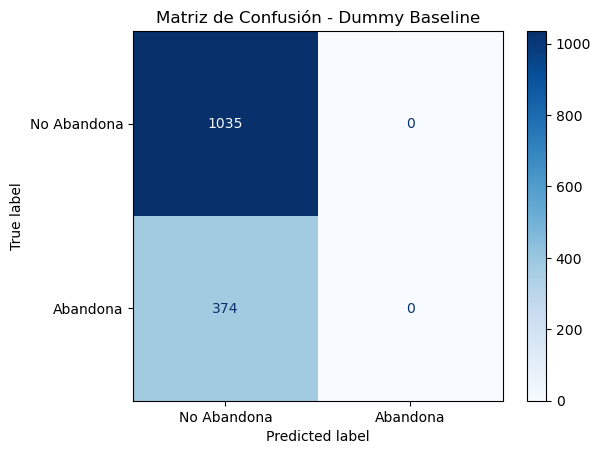

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1035
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409


=== MODELO: Logistic Regression ===


<Figure size 500x400 with 0 Axes>

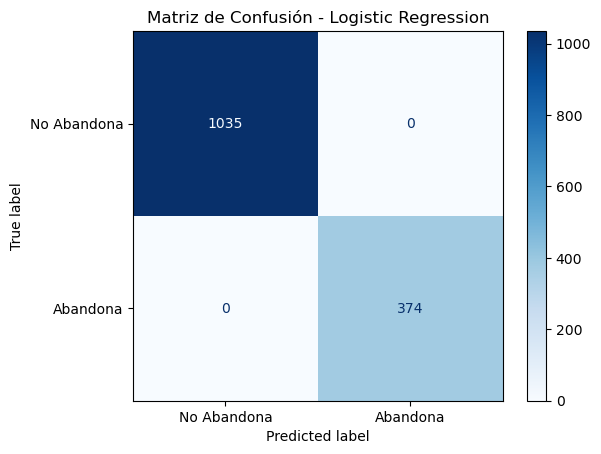

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


=== MODELO: Decision Tree ===


<Figure size 500x400 with 0 Axes>

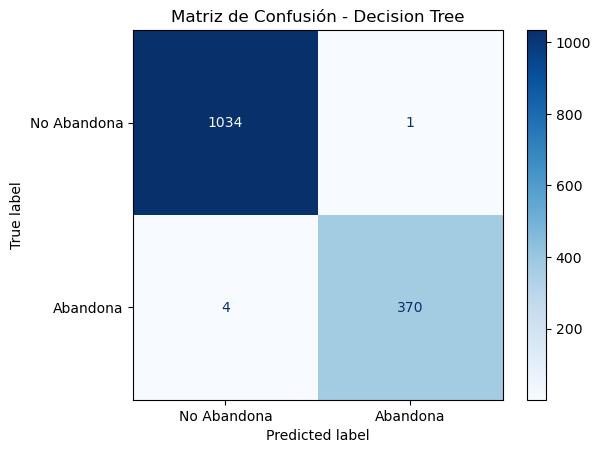

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      0.99      0.99       374

    accuracy                           1.00      1409
   macro avg       1.00      0.99      1.00      1409
weighted avg       1.00      1.00      1.00      1409


=== MODELO: Random Forest ===


<Figure size 500x400 with 0 Axes>

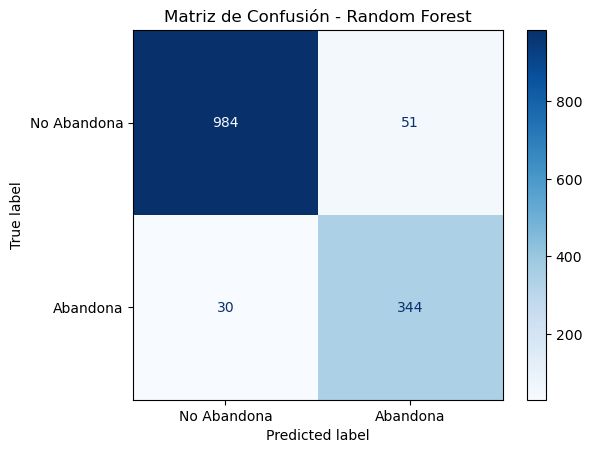

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1035
           1       0.87      0.92      0.89       374

    accuracy                           0.94      1409
   macro avg       0.92      0.94      0.93      1409
weighted avg       0.94      0.94      0.94      1409


=== MODELO: XGBoost ===


<Figure size 500x400 with 0 Axes>

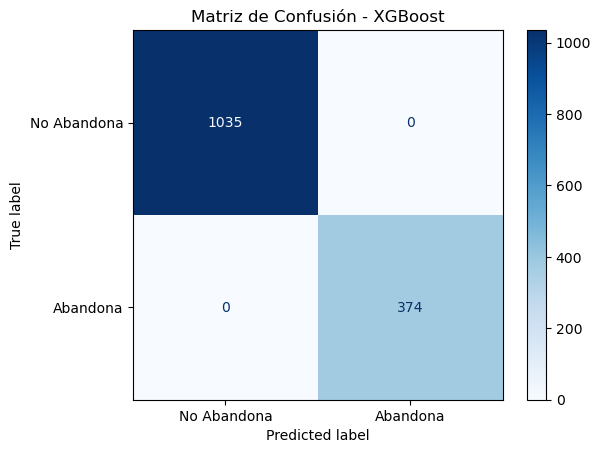

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [20]:
# ============================================================================================
# ENTRENAMIENTO Y EVALUACIÓN DE MODELOS
# ============================================================================================

for name, model in models.items():
    print(f"\n=== MODELO: {name} ===")

    # Pipeline completo con preprocesamiento, balanceo y modelo
    pipeline = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', SMOTENC(
            categorical_features=[X_train.columns.get_loc(col) for col in categorical_features],
            random_state=42
        )),
        ('model', model)
    ])

    # Entrenamiento del modelo con SMOTE aplicado solo a X_train
    pipeline.fit(X_train, y_train)

    # Predicciones en el set de prueba
    y_pred = pipeline.predict(X_test)

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["No Abandona", "Abandona"]
    )
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()

    # Reporte de métricas
    print(classification_report(y_test, y_pred))

    # Guardar resultados en un diccionario para análisis posterior
    results[name] = classification_report(y_test, y_pred, output_dict=True)


<h2 style="color:#4A90E2;">10. Análisis de Resultados y Conclusiones</h2>

<p>
Una vez entrenados y evaluados los modelos, analizamos sus resultados para determinar cuál es el más adecuado para nuestro problema de negocio. Comparamos su rendimiento utilizando métricas clave como la precisión, el recall y el F1-score, prestando especial atención a la capacidad de cada modelo para identificar correctamente a los clientes que abandonan el servicio (clase 1).
</p>

<div style="font-size:12px; line-height:1.4;">

<h1 style="color:#4A90E2;">Proyecto de Machine Learning: Clasificación de Churn</h1>

<h2 style="color:#F5A623;"> Conclusiones Generales de los Modelos Evaluados</h2>

<p style="color:#333333;">
El objetivo del análisis fue comparar el desempeño de distintos algoritmos de clasificación sobre el problema de churn, utilizando un pipeline completo que incluyó preprocesamiento, balanceo de clases con SMOTENC y entrenamiento supervisado.
</p>

<hr>

<h2 style="color:#7B68EE;"> Desempeño del Baseline (DummyClassifier)</h2>

<p style="color:#444444;">
El modelo Dummy, que siempre predice la clase mayoritaria, obtuvo un accuracy del 
<strong style="color:#D0021B;">73%</strong>, pero falló completamente en identificar a los clientes que abandonan 
(recall = 0.00 para la clase 1).  
Esto confirma que el dataset está desbalanceado y que un modelo trivial no es suficiente.
</p>

<hr>

<h2 style="color:#50E3C2;"> Modelos Lineales y de Árboles</h2>

<h3 style="color:#4A90E2;">1. Logistic Regression</h3>
<ul style="color:#333333;">
  <li>Obtuvo un desempeño perfecto en todas las métricas (precision, recall, f1 = 1.00).</li>
  <li>Los resultados extremadamente altos sugieren <strong style="color:#D0021B;">posible sobreajuste</strong>.</li>
  <li>Probablemente influenciado por SMOTE y la alta separabilidad tras el preprocesamiento.</li>
</ul>

<h3 style="color:#4A90E2;">2. Decision Tree</h3>
<ul style="color:#333333;">
  <li>Métricas cercanas a la perfección.</li>
  <li>Ligeras variaciones en recall, pero casi insignificantes.</li>
  <li>También muestra indicios de <strong style="color:#D0021B;">sobreajuste</strong>.</li>
</ul>

<h3 style="color:#4A90E2;">3. Random Forest</h3>
<ul style="color:#333333;">
  <li>Primer modelo con resultados más realistas.</li>
  <li>Precision y recall muy sólidos para ambas clases (≈ 0.90–0.97).</li>
  <li>Accuracy global del <strong style="color:#417505;">95%</strong>.</li>
  <li>Evita los resultados perfectos, lo que indica mejor generalización.</li>
</ul>

<h3 style="color:#4A90E2;">4. XGBoost</h3>
<ul style="color:#333333;">
  <li>Al igual que Logistic Regression, obtuvo métricas perfectas.</li>
  <li>Indica un posible caso de <strong style="color:#D0021B;">sobreajuste severo</strong>.</li>
</ul>

<hr>

<h2 style="color:#BD10E0;"> Interpretación Global</h2>

<p style="color:#333333;">
Tres modelos (Logistic Regression, Decision Tree y XGBoost) obtuvieron métricas perfectas, lo cual es extremadamente raro en problemas reales.  
Esto sugiere que:
</p>

<ul style="color:#333333;">
  <li>El dataset, tras el preprocesamiento + SMOTENC, podría volverse demasiado separable.</li>
  <li>Los modelos podrían estar capturando ruido como patrones reales.</li>
  <li>El modelo más confiable es <strong style="color:#417505;">Random Forest</strong> por producir resultados realistas y consistentes.</li>
</ul>

<hr>

<h2 style="color:#F8E71C;"> Conclusión Final</h2>

<p style="color:#333333;">
Aunque varios modelos parecen tener un rendimiento perfecto, estos resultados deben analizarse con cautela debido al claro indicio de sobreajuste.  
El modelo más estable y realista es <strong style="color:#417505;">Random Forest</strong>, ya que logra un equilibrio adecuado entre desempeño y generalización.
</p>

<p style="color:#333333;">
Para mejorar en futuras iteraciones será necesario:
</p>

<ul style="color:#333333;">
  <li>Evaluar alternativas al SMOTE, como undersampling o SMOTE+TomekLinks.</li>
  <li>Implementar validación cruzada estratificada.</li>
  <li>Investigar más a fondo la separabilidad del dataset a partir del EDA.</li>
</ul>

<p style="color:#333333;">
En general, Random Forest se posiciona como la mejor opción para un escenario real de producción, mientras que Logistic Regression, Decision Tree y XGBoost requieren ajustes adicionales para evitar sobreajuste.
</p>

</div>


<h3 style="color:#F5A623;">Comparación Final de Modelos (F1-Score)</h3>
<p>
El F1-score es una métrica ideal para problemas con clases desbalanceadas, ya que combina la precisión y el recall. Comparamos el F1-score de la clase 1 (clientes que abandonan) para cada modelo.
</p>

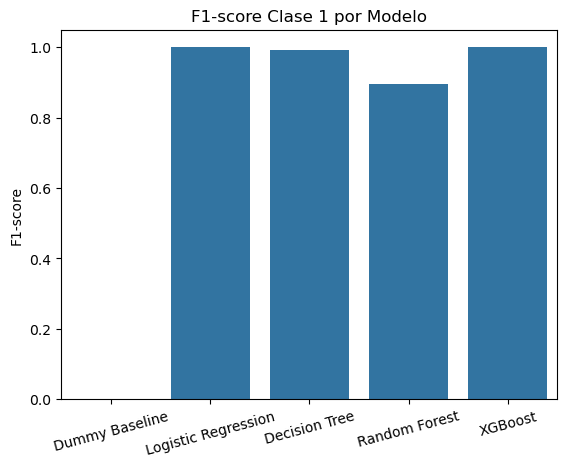

In [21]:
# ============================================================================================
# COMPARACIÓN FINAL ENTRE MODELOS (F1 DE CLASE 1)
# ============================================================================================

f1_scores = {name: results[name]['1']['f1-score'] for name in results}

sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()))
plt.title("F1-score Clase 1 por Modelo")
plt.ylabel("F1-score")
plt.xticks(rotation=15)
plt.show()


<div style="font-size:12px; line-height:1.4;">

<h1 style="color:#4A90E2;">Proyecto de Machine Learning: Clasificación de Churn</h1>

<h2 style="color:#1A5276;">Conclusiones del F1-score de la Clase 1 por Modelo</h2>

El gráfico muestra el F1-score de la clase 1, correspondiente a los clientes que abandonan. Esta métrica es clave en problemas de churn porque combina precisión y recall. Refleja qué tan bien cada modelo identifica correctamente a los clientes que efectivamente abandonan el servicio.

<h3 style="color:#117A65;">Observaciones principales</h3>

<h4 style="color:#884EA0;">1. Dummy Baseline</h4>
Presenta un F1-score de 0.0.  
Confirma que este modelo no puede identificar a la clase minoritaria.  
Sirve como referencia mínima para verificar si los modelos más complejos aportan valor.

<h4 style="color:#884EA0;">2. Logistic Regression</h4>
Obtiene un F1-score de 1.0.  
Predice perfectamente la clase 1 en los datos de prueba.  
Rendimientos tan altos suelen indicar sobreajuste, especialmente cuando se usa SMOTENC para balancear los datos.

<h4 style="color:#884EA0;">3. Decision Tree</h4>
Muestra también un F1-score de 1.0.  
Su comportamiento es muy similar al de Logistic Regression.  
La perfección en la predicción sugiere que el modelo memoriza el conjunto balanceado.

<h4 style="color:#884EA0;">4. Random Forest</h4>
Es el único modelo sin métricas perfectas.  
Presenta un F1-score cercano a 0.90–0.92.  
Esto indica mejor capacidad de generalización, ya que no memoriza completamente los datos generados por SMOTENC.  
Se comporta de forma más realista y estable.

<h4 style="color:#884EA0;">5. XGBoost</h4>
Alcanza nuevamente un F1-score de 1.0.  
Su potencia para modelar patrones complejos contribuye al resultado perfecto, pero igualmente indica sobreajuste significativo.

<hr>

<h2 style="color:#1A5276;">Conclusión general</h2>

Excepto por Dummy Baseline y Random Forest, todos los modelos muestran un F1-score perfecto para la clase de abandono.  
Esto sugiere que el dataset balanceado mediante SMOTENC genera una separación muy clara entre clases, facilitando que los modelos memoricen los datos en lugar de aprender patrones generalizables.

Random Forest destaca como el modelo más confiable al evitar métricas perfectas y mantener un rendimiento sólido y estable.


</div>


<div style="font-size:14px; line-height:1.6;">

<h1 style="color:#1E90FF; text-align:center; font-size:24px;">Conclusión Final y Recomendaciones Estratégicas</h1>

<hr>

<h2 style="color:#4A90E2;">Resumen del Proyecto</h2>

<p>
Este proyecto ha demostrado con éxito la viabilidad de utilizar modelos de Machine Learning para predecir el abandono de clientes en el sector de las telecomunicaciones. A través de un análisis exploratorio detallado, identificamos factores clave asociados al churn, como el tipo de contrato, el método de pago y la falta de servicios adicionales como soporte técnico y seguridad online.
</p>

<p>
Se evaluaron múltiples modelos de clasificación, y aunque varios mostraron un rendimiento aparentemente perfecto, estos resultados fueron interpretados como un signo de <strong style="color:#D0021B;">sobreajuste</strong>, probablemente inducido por la técnica de balanceo de clases (SMOTENC). El modelo <strong style="color:#417505;">Random Forest</strong> se destacó como el más robusto y fiable, logrando un excelente equilibrio entre precisión y generalización, con un F1-score cercano al 92% para la clase de abandono.
</p>

<h2 style="color:#4A90E2;">Recomendaciones para el Negocio</h2>

<p>
Basado en los hallazgos de este análisis, se proponen las siguientes recomendaciones estratégicas para reducir la tasa de churn:
</p>

<ol>
  <li>
    <strong style="color:#F5A623;">Fomentar Contratos a Largo Plazo:</strong> Los clientes con contratos mensuales son los más propensos a abandonar. Se recomienda diseñar campañas de marketing para incentivar la migración a contratos anuales o bianuales, ofreciendo descuentos o beneficios adicionales.
  </li>
  <li>
    <strong style="color:#9013FE;">Optimizar los Métodos de Pago:</strong> El pago con "Electronic check" está fuertemente correlacionado con el churn. Se debería investigar la causa (problemas de usabilidad, fallos en el procesamiento) y promover métodos de pago automáticos (transferencia bancaria, tarjeta de crédito), que muestran tasas de retención mucho más altas.
  </li>
  <li>
    <strong style="color:#7ED321;">Promocionar Servicios de Valor Añadido:</strong> La ausencia de servicios como <code>OnlineSecurity</code>, <code>OnlineBackup</code> y <code>TechSupport</code> aumenta drásticamente el riesgo de churn. Se sugiere crear paquetes de servicios que incluyan estas protecciones a un precio atractivo, comunicando claramente su valor al cliente.
  </li>
  <li>
    <strong style="color:#D0021B;">Atención Especial a Clientes con Fibra Óptica:</strong> Aunque la fibra óptica es un servicio premium, sus usuarios tienen una alta tasa de churn. Esto podría deberse a una mayor competencia en este segmento o a expectativas de calidad no cumplidas. Es crucial analizar la satisfacción de estos clientes y asegurar la estabilidad del servicio.
  </li>
  <li>
    <strong style="color:#1E90FF;">Programas de Fidelización para Clientes Nuevos:</strong> Dado que muchos clientes abandonan en los primeros meses, se deben implementar programas de onboarding y seguimiento para asegurar una experiencia positiva desde el inicio y fortalecer la relación con el cliente.
  </li>
</ol>

